# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [66]:
# Import numpy and pandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from sklearn.linear_model import LinearRegression

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:
sensor.shape

(1751, 12)

In [4]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [5]:
# Your code here:
nan_value = float("NaN")
sensor.replace("", nan_value, inplace=True)
sensor.replace(0, nan_value, inplace=True)
sensor.dropna(inplace=True)


In [6]:
#sensor.sample(25)

How many rows and columns are in our data?

In [7]:
# Your code here:

sensor.shape


(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [8]:
len(sensor)

1751

In [9]:
# Your code here:
dates = pd.date_range("01/01/2018 00:00:00","01/01/2018 00:29:10", periods=len(sensor))
dates

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

In [10]:
freq = pd.infer_freq(dates)
print(freq)

S


In [11]:
dates.freq = freq
dates

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')

Assign the time series index to the dataframe's index.

In [85]:
# Your code here:
sensor["Dates"] = dates
sensor.set_index("Dates", inplace=True)
sensor.head(3)

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
Dates,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

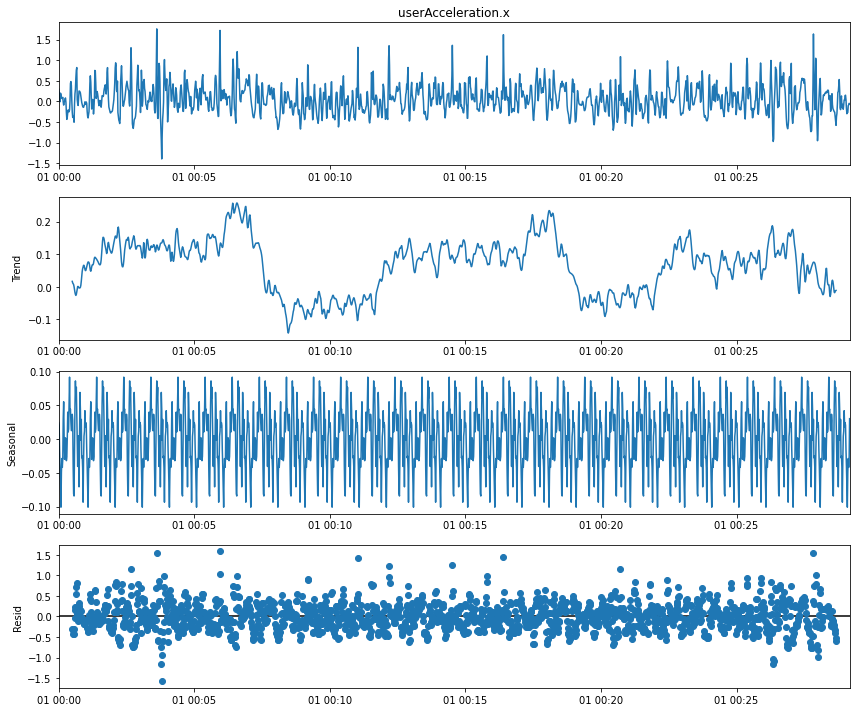

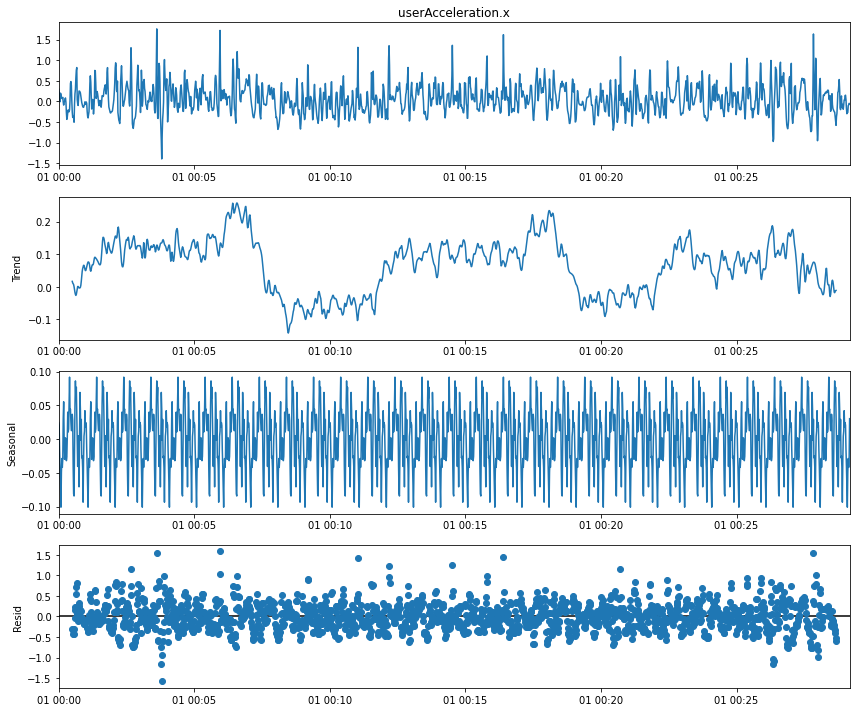

In [91]:
# Your code here:
plt.rcParams['figure.figsize'] = (12, 10)
acc = seasonal_decompose(sensor["userAcceleration.x"], model="additive", period = 60)
acc.plot()

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

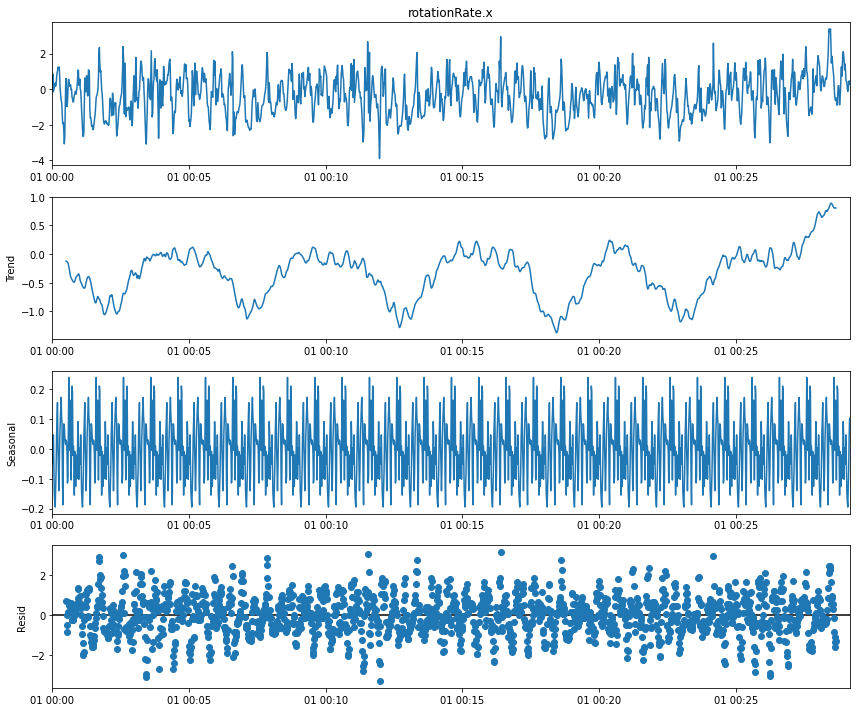

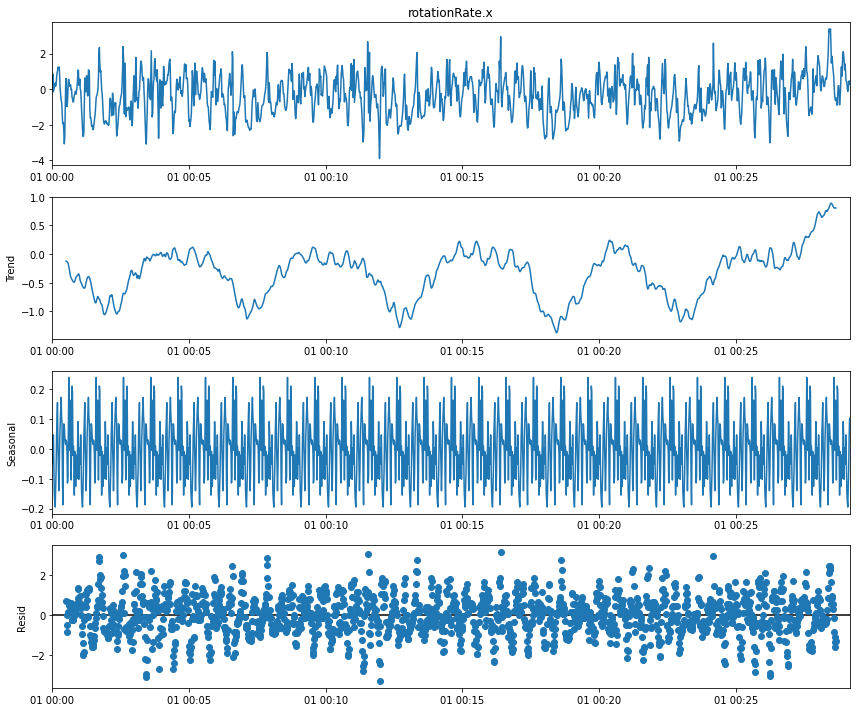

In [90]:
# Your code here:
plt.rcParams['figure.figsize'] = (12, 10)
rot = seasonal_decompose(sensor["rotationRate.x"], model="additive", period = 60)
rot.plot()

Let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

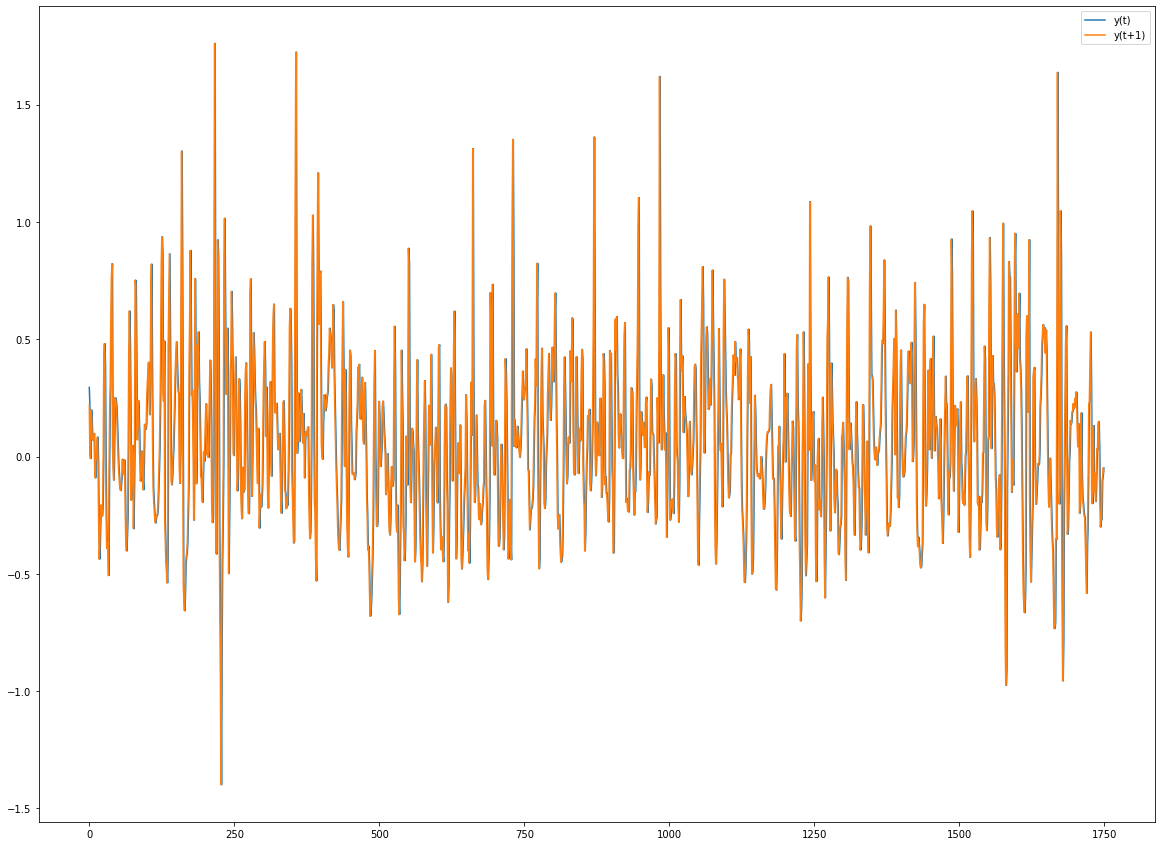

In [58]:
sensor_t = sensor["userAcceleration.x"][:-1]
sensor_t_plus_1 = sensor["userAcceleration.x"][1:]
plt.figure(figsize=(20,15))
plt.plot(sensor_t.values, label="y(t)")
plt.plot(sensor_t_plus_1.values, label="y(t+1)")
plt.legend();

No handles with labels found to put in legend.


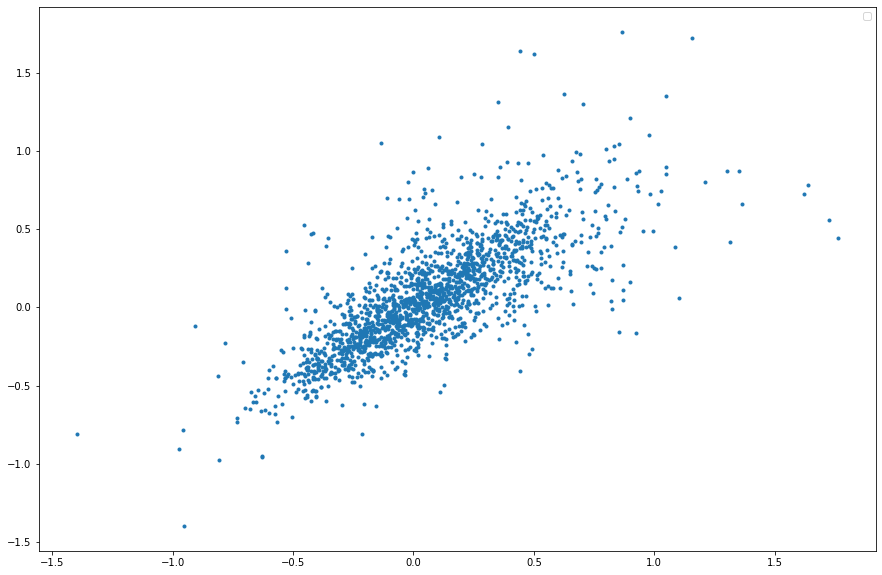

In [59]:
plt.figure(figsize=(15,10))
plt.scatter(sensor_t.values, sensor_t_plus_1, marker = ".")
plt.legend()


In [60]:
acc_rot = np.corrcoef(sensor_t, sensor_t_plus_1)[0][1]
acc_rot

0.759703623934424

Create a lag plot for `rotationRate.x`

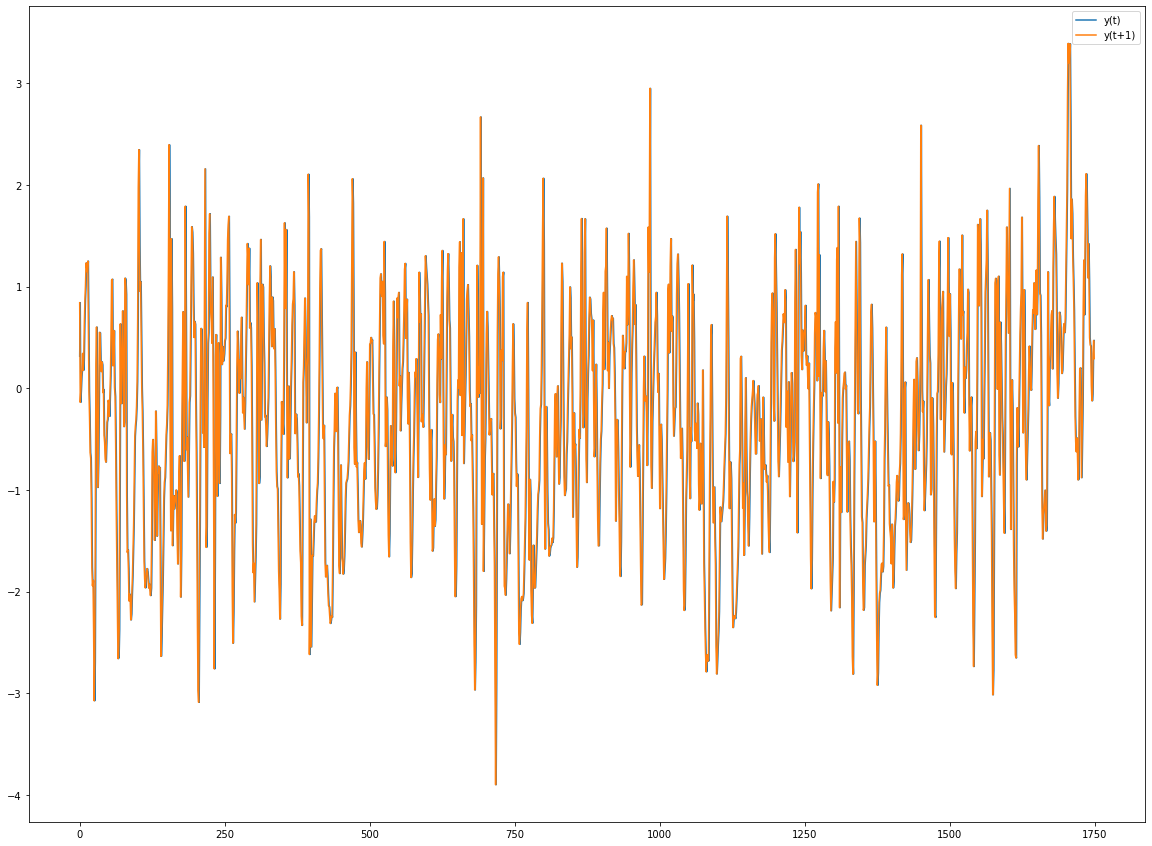

In [47]:
sensor_t = sensor["rotationRate.x"][:-1]
sensor_t_plus_1 = sensor["rotationRate.x"][1:]
plt.figure(figsize=(20,15))
plt.plot(sensor_t.values, label="y(t)")
plt.plot(sensor_t_plus_1.values, label="y(t+1)")
plt.legend();

No handles with labels found to put in legend.


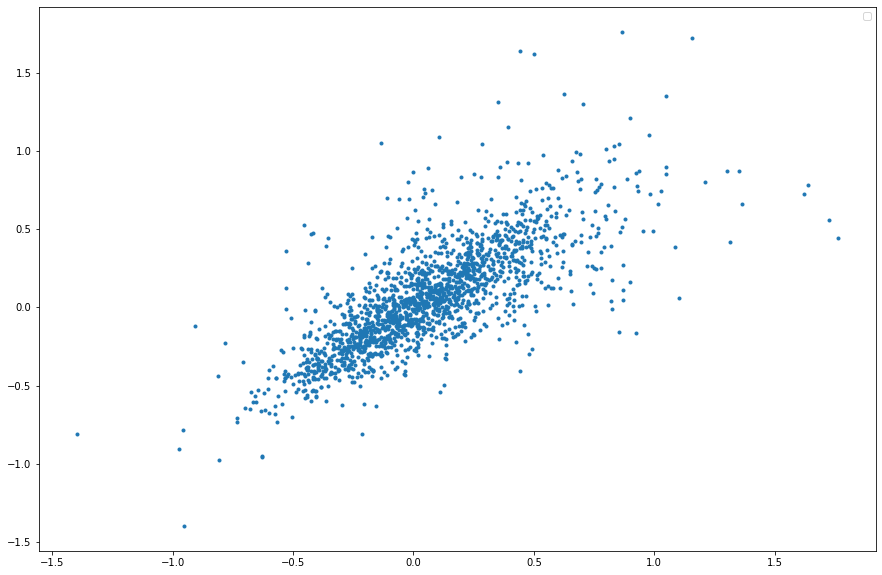

In [65]:
plt.figure(figsize=(15,10))
plt.scatter(sensor_t.values, sensor_t_plus_1, marker=".")
plt.legend()


In [56]:
rot_corr = np.corrcoef(sensor_t, sensor_t_plus_1)[0][1]
rot_corr

0.8470904664379265

What are your conclusions from both visualizations?

There is more correlation in `rotationRate.x (0.85)` than in `userAcceleration.x (0.76)`


The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [79]:
acc2 = adfuller(sensor["userAcceleration.x"])
adf_a, pvalue_a, usedlag_a, nobs_a, critical_values_a, icbest_a = acc2

In [80]:
adf_a

-17.957994086169762

In [81]:
rot2 = adfuller(sensor["rotationRate.x"])
adf_r, pvalue_r, usedlag_r, nobs_r, critical_values_r, icbest_r = rot2
adf_r

-5.269860625086417

What are your conclusions from this test?

In [87]:
critical_values_r

{'1%': -3.4341465551936534,
 '5%': -2.863216966926812,
 '10%': -2.567662770090317}

If our adf was `-5` and `-17`, we can reject  $ H_0 $ being 99% sure, so in the case of `rotationRAte.x` and `userAcceleration.x` we can be 99% certain that we can reject the $H_0$.
